In [18]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [19]:
train_df = pd.read_csv('./data/train_data.csv')
val_df = pd.read_csv('./data/val_data.csv')
sample_df = pd.read_csv('./data/sample_submission.csv')
#train_df.dropna(inplace=True)

In [20]:
#centerpoint= (47.598963, -122.252133)  #center point of city center
centerpoint= (47.628591, -122.289796)  #center point of city center
#centerpoint= (47.620922, -122.311413)  #center point of city center

In [21]:
train_df.describe()

,Unique_idx,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,...,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,1.729000e+04
mean,10821.135454,4.577035e+09,3.366455,2.111567,2074.586293,1.521099e+04,1.493522,0.007750,0.234182,3.410700,...,1782.821920,291.764372,1970.915095,84.596992,98078.057779,47.559674,-122.214147,1984.131463,12790.231984,5.378806e+05
std,6233.894051,2.877097e+09,0.934061,0.765353,903.771540,4.282989e+04,0.540177,0.087696,0.763897,0.651334,...,816.765091,441.081555,29.418996,402.087484,53.559522,0.138770,0.140738,681.613827,27728.922431,3.539798e+05
min,0.000000,1.000102e+06,0.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000,7.500000e+04
25%,5408.500000,2.122785e+09,3.000000,1.500000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470225,-122.329000,1490.000000,5100.000000,3.220000e+05
50%,10857.500000,3.904921e+09,3.000000,2.250000,1920.000000,7.605000e+03,1.500000,0.000000,0.000000,3.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571300,-122.231000,1840.000000,7615.000000,4.500000e+05
75%,16222.500000,7.308600e+09,4.000000,2.500000,2550.000000,1.063075e+04,2.000000,0.000000,0.000000,4.000000,...,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.677700,-122.125000,2360.000000,10067.500000,6.450000e+05
max,21612.000000,9.900000e+09,33.000000,6.750000,9640.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,8020.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000,5.570000e+06


In [22]:
train_df.head(3)

,Unique_idx,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7291,4058200630,20141002T000000,3,1.75,2190,7021,1.0,0,2,...,1390,800,1953,0,98178,47.5033,-122.232,2180,7155,353000
1,14835,3613600150,20150105T000000,3,2.50,2370,6840,2.0,0,0,...,2370,0,1987,0,98119,47.6503,-122.366,1590,4400,300523
2,15880,7170200080,20140617T000000,2,1.00,1230,3800,1.0,0,0,...,1230,0,1928,0,98115,47.6797,-122.292,1610,3800,435000


In [23]:
train_df.dtypes

Unique_idx         int64
id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

Text(0.5, 1.0, 'price box plot')

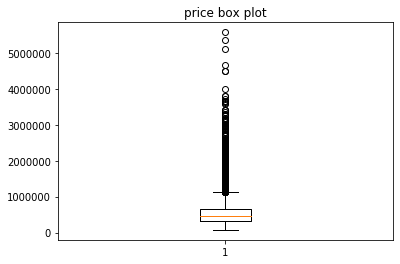

In [24]:
plt.boxplot(train_df.iloc[:,-1])
plt.title('price box plot')

Text(0.5, 1.0, 'price histogram')

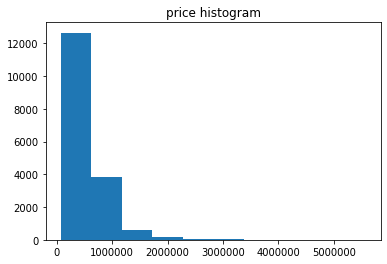

In [25]:
plt.hist(train_df.iloc[:,-1])
plt.title('price histogram')

In [26]:
val_df.describe()

,Unique_idx,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,4323.000000,4.323000e+03,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.00000,4323.000000,4323.000000,4323.000000,4323.00000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000
mean,10745.465186,4.593364e+09,3.388388,2.127516,2101.151053,14690.944020,1.497455,0.006708,0.234791,3.404349,7.66019,1810.663197,290.487856,1971.365256,83.62341,98077.467962,47.561566,-122.212893,1996.235485,12681.360398
std,6261.132211,2.874737e+09,0.913787,0.789071,974.727198,35225.710884,0.539288,0.081639,0.776012,0.648424,1.18644,871.662329,448.548670,29.190990,400.08771,53.290075,0.137739,0.141201,700.292240,25537.740132
min,4.000000,1.200019e+06,0.000000,0.000000,290.000000,649.000000,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.00000,98001.000000,47.180800,-122.511000,460.000000,651.000000
25%,5380.500000,2.124059e+09,3.000000,1.750000,1440.000000,5087.500000,1.000000,0.000000,0.000000,3.000000,7.00000,1200.000000,0.000000,1952.000000,0.00000,98033.000000,47.472800,-122.325000,1490.000000,5114.500000
50%,10638.000000,3.904961e+09,3.000000,2.250000,1900.000000,7650.000000,1.500000,0.000000,0.000000,3.000000,7.00000,1580.000000,0.000000,1976.000000,0.00000,98065.000000,47.574000,-122.228000,1850.000000,7656.000000
75%,16134.500000,7.309100e+09,4.000000,2.500000,2550.000000,10800.000000,2.000000,0.000000,0.000000,4.000000,8.00000,2220.000000,570.000000,1997.000000,0.00000,98117.000000,47.679450,-122.126000,2360.000000,10157.500000
max,21608.000000,9.839301e+09,9.000000,8.000000,13540.000000,920423.000000,3.500000,1.000000,4.000000,5.000000,13.00000,9410.000000,4130.000000,2015.000000,2015.00000,98199.000000,47.777500,-121.315000,6210.000000,411962.000000


In [27]:
dist_df = train_df.loc[:,['Unique_idx','lat','long','price']]
dist_df['ss_latLon'] = dist_df['lat']*dist_df['lat'] + dist_df['long']*dist_df['long']
print(dist_df['ss_latLon'])
dist_df['ss_latLon'] = np.sqrt(dist_df['ss_latLon'])
dist_df['ss_latLon']


#dist_df['price'] = dist_df['price'].astype(float) 

0        17197.225335
1        17243.989046
2        17228.687056
3        17192.722296
4        17247.243847
5        17197.412227
6        17138.552217
7        17148.277792
8        17207.653865
9        17160.750842
10       17143.402512
11       17241.403334
12       17221.581451
13       17179.293429
14       17158.510404
15       17235.180559
16       17248.192550
17       17254.251199
18       17241.373728
19       17222.451397
20       17232.347051
21       17172.302552
22       17182.982243
23       17225.582504
24       17214.574796
25       17246.472097
26       17207.091781
27       17236.939810
28       17128.123035
29       17226.714749
             ...     
17260    17076.955735
17261    17154.672578
17262    17216.484169
17263    17198.988804
17264    17170.992883
17265    17203.557257
17266    17240.026182
17267    17251.568580
17268    17238.942682
17269    17175.857052
17270    17182.672191
17271    17163.361258
17272    17204.988887
17273    17202.289252
17274    1

0        131.138192
1        131.316370
2        131.258093
3        131.121022
4        131.328762
5        131.138904
6        130.914293
7        130.951433
8        131.177947
9        130.999049
10       130.932817
11       131.306524
12       131.231023
13       131.069804
14       130.990497
15       131.282827
16       131.332374
17       131.355438
18       131.306412
19       131.234338
20       131.272035
21       131.043132
22       131.083875
23       131.246267
24       131.204325
25       131.325824
26       131.175805
27       131.289527
28       130.874455
29       131.250580
            ...    
17260    130.678827
17261    130.975847
17262    131.211601
17263    131.144915
17264    131.038135
17265    131.162332
17266    131.301280
17267    131.345227
17268    131.297154
17269    131.056694
17270    131.082692
17271    131.009012
17272    131.167789
17273    131.157498
17274    131.316748
17275    131.241794
17276    131.260657
17277    130.872279
17278    131.062786


0        0.137979
1        0.079236
2        0.051157
3        0.117056
4        0.101178
5        0.146066
6        0.367573
7        0.291987
8        0.072977
9        0.244489
10       0.314225
11       0.125186
12       0.046657
13       0.242545
14       0.304320
15       0.096640
16       0.132961
17       0.121988
18       0.069793
19       0.135605
20       0.286676
21       0.236126
22       0.176277
23       0.143800
24       0.071815
25       0.308202
26       0.239230
27       0.151847
28       0.413329
29       0.053939
           ...   
17260    0.559012
17261    0.264079
17262    0.054318
17263    0.108492
17264    0.372967
17265    0.099669
17266    0.074890
17267    0.113374
17268    0.060490
17269    0.195848
17270    0.194122
17271    0.237778
17272    0.166275
17273    0.155076
17274    0.143914
17275    0.020269
17276    0.145994
17277    0.376077
17278    0.244244
17279    0.302211
17280    0.193586
17281    0.140229
17282    0.075388
17283    0.215076
17284    0

Text(0.5, 1.0, 'dist from city center vs price')

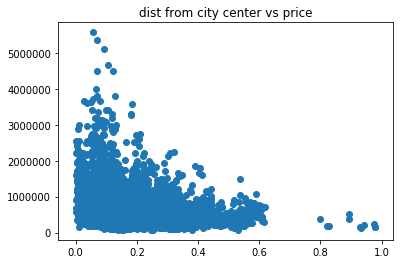

In [28]:
dist_df = train_df.loc[:,['Unique_idx','lat','long','price']]

dist_df['dist_latLon'] = np.sqrt(np.square(dist_df['lat']- centerpoint[0]) + np.square(dist_df['long']-centerpoint[1]))

print(dist_df['dist_latLon'])
plt.scatter(dist_df['dist_latLon'], dist_df['price'])
plt.title('dist from city center vs price')
#dist_df['price'] = dist_df['price'].astype(float) 

In [29]:

#plt.scatter(dist_df['ss_latLon'], dist_df['price'])

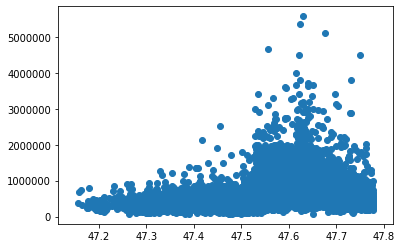

In [30]:
plt.scatter(dist_df['lat'], dist_df['price'])

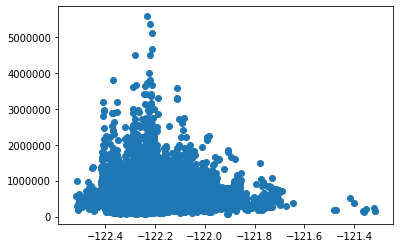

In [31]:
plt.scatter(dist_df['long'], dist_df['price'])

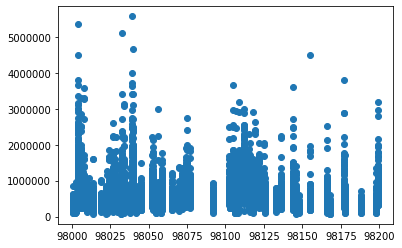

In [32]:
plt.scatter(train_df['zipcode'], train_df['price'])

In [33]:
dist_df
train_df.iloc[:1000,np.r_[3:8,21]]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
0,3,1.75,2190,7021,1.0,353000
1,3,2.50,2370,6840,2.0,300523
2,2,1.00,1230,3800,1.0,435000
3,4,2.25,2510,9963,1.0,800000
4,3,1.00,1160,7491,1.0,417500
5,4,1.00,1220,7980,1.5,260000
6,4,2.50,1960,5238,2.0,260000
7,3,2.50,2060,4812,2.0,533000
8,4,2.50,2700,17853,2.0,1557600
9,4,2.25,2470,17008,2.0,625000


In [34]:
#sns.pairplot(train_df.iloc[:500,np.r_[12:20,21]] )

In [35]:
#just to confirm data 
#print(train_df.iloc[0:12000,-1])
#print(train_df.iloc[0:12000,3:-1])

In [36]:
train_df.drop(['lat','long'], axis=1, inplace = True)

In [37]:

price_df = train_df['price']
train_df.drop(['price'], axis=1, inplace = True)

In [38]:
train_df['dist_latlon'] = dist_df['dist_latLon']
train_df['price'] = price_df
print(train_df) 

       Unique_idx          id             date  bedrooms  bathrooms  \
0            7291  4058200630  20141002T000000         3       1.75   
1           14835  3613600150  20150105T000000         3       2.50   
2           15880  7170200080  20140617T000000         2       1.00   
3            8812  9542300530  20141124T000000         4       2.25   
4           17220  3626039028  20140818T000000         3       1.00   
5           18565  7657000540  20150304T000000         4       1.00   
6             335  5009600070  20141007T000000         4       2.50   
7            6273  3905050280  20140819T000000         3       2.50   
8           10979  1925059200  20150407T000000         4       2.50   
9           13225   424069010  20140721T000000         4       2.25   
10          13566  8691310040  20140826T000000         4       2.50   
11          13795  9100000040  20140807T000000         3       1.75   
12           8471   714000315  20150414T000000         3       2.75   
13    

In [39]:
percent = 0.7  #choose percent to split 
n= train_df.shape[0] #number of rows in data set before splitting
s= math.floor(percent * n)
y= train_df.iloc[0:s,-1]
X = train_df.iloc[0:s,3:-1]

y_test= train_df.iloc[s:n,-1]
X_test = train_df.iloc[s:n,3:-1]

In [40]:
print(X_test)

       bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
12103         3       2.25         2780     31510     2.0           0     0   
12104         3       1.00         1360      5967     1.0           0     0   
12105         5       2.50         2780     12335     1.0           0     0   
12106         3       1.75         1070      9000     1.0           0     0   
12107         4       2.25         3490      6906     2.0           0     0   
12108         5       1.75         2860     12293     1.0           0     0   
12109         3       2.00         1470      7694     1.0           0     0   
12110         3       1.50         1610     13500     1.0           0     0   
12111         4       3.50         4210     10308     2.0           0     0   
12112         4       1.50         3520      4933     1.5           0     0   
12113         3       2.50         2090      8653     2.0           0     0   
12114         3       1.00         1320     24684   

In [41]:
model=sm.OLS(y,X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.915
Model:                            OLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                              8157.
Date:                Mon, 10 Feb 2020   Prob (F-statistic):                        0.00
Time:                        21:32:28   Log-Likelihood:                     -1.6402e+05
No. Observations:               12103   AIC:                                  3.281e+05
Df Residuals:                   12087   BIC:                                  3.282e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [42]:
model_skl= LinearRegression().fit(X,y)
print('Rsquared(sklearn) = ', model_skl.score(X,y))
yhat_skl = model_skl.predict(X_test)
yhat_skl = yhat_skl.astype(int)
delta = yhat_skl - y_test
mse_skl = np.sqrt(np.mean(np.square(delta)))
print('mse_skl = ', mse_skl)

Rsquared(sklearn) =  0.7188320786754764
mse_skl =  199305.69520406434


In [43]:
#compare to test data
yhat = model.predict(X_test)
yhat = yhat.astype(int)
#print(y_test)
#print(yhat)
#print(np.abs(yhat-y_test))
delta = yhat - y_test
mse = np.sqrt(np.mean(np.square(delta)))
print('mse (stats model) = ', mse)

mse (stats model) =  202161.98643826804


In [44]:
#both stats model and sklearn have almost the as mse
mse/mse_skl


1.014331207300821